# Introducción a los métodos de regresión
<hr />

In [128]:
## funcion de minimos cuadrados con modelo lineal
def totales(datos):
    [X,Y,XX,YY,XY] = [0.0,0.0,0.0,0.0,0.0]
    for p in datos:
        X += p[0]
        Y += p[1]
        XX += pow(p[0],2.0)
        YY += pow(p[1],2.0)
        XY += p[0]*p[1]
    return [X,Y,XX,YY,XY]
    
def mincua_linear(datos,**args):
    [X,Y,XX,YY,XY] = totales(datos)
    m = len(datos)
    
    def linear(x):
        a0 = (Y*XX-X*XY)/(m*XX-X*X)
        a1 = (m*XY-X*Y)/(m*XX-X*X)
        return a0+a1*x 
    return linear

## funcion que calcula el coeficiente de correlación
def R2(datos,linear):
    import math as mt
    [X,Y,XX,YY,XY] = totales(datos)
    m = len(datos)
    return (m*XY-X*Y)/(mt.sqrt((m*XX-X*X)*(m*YY-Y*Y)))

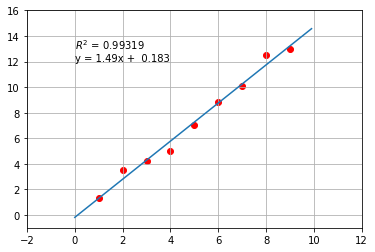

In [166]:
import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
%matplotlib inline

# esta funcion ejecuta el gráfico de regresion para un cierto valor
# de la amplitud de ruido en los datos.
# -> esta forma se escoge para posterior uso dentro del widget interactivo.
def plot_reg(amp=0.0):
    datos = [(1.0, 1.3), (2.0, 3.5), (3.0, 4.2), (4.0, 5.0), (5.0, 7.0),(6.0, 8.8), (7.0, 10.1), (8.0, 12.5), (9.0, 13.0)]
    m = len(datos)
    noise = np.random.normal(0,amp,m)
    datos_noise = []
    
    for i,p in enumerate(datos):
        datos_noise.append((p[0],p[1]+noise[i]))
    model = mincua_linear(datos_noise)
    
    def model_const(model_str,digits):
        concat = []
        for p in model_str.split('*'):
            if '-' in p:
                concat += p.split('-')
            else:
                concat += p.split('+')
        return [concat[0][:digits+2],concat[2][:digits+2]]
    
    z = sym.symbols('z')
    model_st = str(sym.sympify(model(z),z))
    cts = model_const(model_st,4)
    
    r2 = round(R2(datos_noise,model),5)
    x = np.arange(0.0,10.0,0.1)
    v_model = np.vectorize(model)
    y = v_model(x)
    plt.plot(x,y)
    plt.text(0, 13, r'$R^2$ = '+str(r2), fontsize=10)
    plt.text(0, 12,'y = '+cts[0]+'x + '+cts[1], fontsize=10)
    for p in datos_noise:
        plt.scatter(p[0],p[1],c='r')
    plt.grid(True)
    plt.xlim([-2, 12])
    plt.ylim([-1, 16])
    return None

plot_reg(0.0)

# Simulaciones dinamicas con ipywidgets
<hr />
##### Para poder usar ipywidgets con un servidor montado desde tu pc, debes seguir las siguientes instrucciones de instalación: 
https://ipywidgets.readthedocs.io/en/latest/user_install.html

In [168]:
from ipywidgets import interactive, fixed
interactive(plot_reg,amp=(0.0,5.0))

interactive(children=(FloatSlider(value=0.0, description='amp', max=5.0), Output()), _dom_classes=('widget-int…